In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import sort
from sklearn.feature_selection import SelectFromModel
# import seaborn as sns
import csv
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, LeaveOneGroupOut, GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\Sezin\anaconda3\envs\lab39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#pip install xgboost


# XGBOOST

# HARDNESS 

In [3]:
# 30 + 12 + 12 data + others
path = 'C:/Users/Sezin/Documents/FoodAI/feature_selection/30_12_12_leave_group_o/Figures/Feature_Subsets/additional_30_12_12.csv'
data = pd.read_csv('C:/Users/Sezin/Documents/FoodAI/feature_selection/30_12_12_leave_group_o/Figures/Feature_Subsets/additional_30_12_12.csv')
m = data.shape[0]
print(f'number of samples: {m}')

data = data.replace(['YPI-com','YPI-local','FBC-com', 'FBI-local'], [79, 81, 56, 88])
data.WG_frac = pd.to_numeric(data.WG_frac)
groups = list(data.WG_frac.unique())
m_groups = len(groups)
print(f'groups: {groups}')
print(f'number of groups: {m_groups}')

# colors
cm_subsection = np.linspace(0.1, 0.98, m_groups)
colors = [cm.jet(x) for x in cm_subsection]
gcolors = dict(zip(groups, colors))
# markers
chiang19 = 'o'
chiang21 = 'd'
HMMA = '^'
markers = 4*chiang19 + 4*chiang21 + 4*HMMA
gmarkers = dict(zip(groups, markers))

print(f'features: {data.columns.values}')

number of samples: 54
groups: [0, 10, 20, 30, 40, 60, 80, 100, 79, 81, 56, 88]
number of groups: 12
features: ['no' 'WG_frac' 'protein' 'target moisture' 'moisture' 'ash' 'carbs' 'fat'
 'fiber' 'Hardness' 'Chewiness' 'Group_ID' 'Study_ID' 'Unnamed: 13'
 'Unnamed: 14']


features: ['protein' 'target moisture' 'moisture' 'ash' 'carbs' 'fat' 'fiber']


C:\Users\Sezin\anaconda3\envs\lab39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


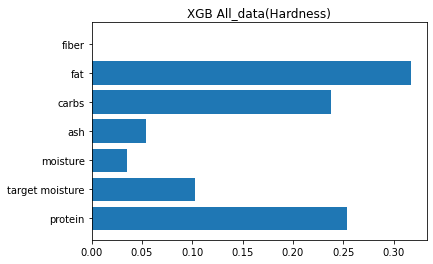

In [4]:
# default parameters
X_xg_hard = data.iloc[:, 2:9]
response = 'Hardness'
y = data.loc[:, response]
print(f'features: {X_xg_hard.columns.values}')

xg_hard = xgb.XGBRegressor()

gkfold = GroupKFold(n_splits=m_groups).split(X_xg_hard, y, list(data.WG_frac))
y_predicted = [0 for i in range(m)]
y_true_groups = [[] for i in range(m_groups)]
y_predicted_groups = [[] for i in range(m_groups)]
y_predicted_2=[]
y_true_2=[]

scores_sum=0


# print(test_features)
xg_hard.fit(X_xg_hard, y)

scores_sum += xg_hard.feature_importances_
plt.barh(X_xg_hard.columns, xg_hard.feature_importances_)
plt.title('XGB All_data'+ '('+response+')')
plt.show()

#plt.savefig('a.pdf')

# Ridge

   target moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3  3  3  3  3  3
  3  3  4  4  4  4]
12


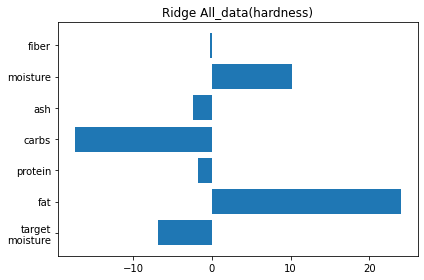

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('30_12_12.csv',header=0)
features_all_ridge_hard=data.iloc[:,1:8]
response = 'hardness'
if response=='crosswise':
    X = np.array(features_all_ridge_hard)


elif response=='lengthwise':
    X = np.array(features_all_ridge_hard)

    
elif response=='chewiness':
    X = np.array(features_all_ridge_hard)
    y = np.array(data.iloc[:,9:10])
    print(features_all_ridge_hard.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all_ridge_hard)
    y = np.array(data.iloc[:,8:9])
    print(features_all_ridge_hard.head())
    print(data.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all_ridge_hard.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

ridge_hard = Ridge().fit(X_tr, y.ravel())

# residual =  y_test.ravel()-prediction
# residuals_.append(residual)  
fig,ax = plt.subplots(1)

xll =features_all_ridge_hard.rename(columns={"target moisture": "target\nmoisture"})

plt.barh(xll.columns, ridge_hard.coef_)
plt.title('Ridge All_data'+ '('+response+')')
plt.tight_layout()

plt.show()





In [6]:
xll =features_all_ridge_hard.rename(columns={"target moisture": "target\nmoisture"})


# RF

   protein  target moisture  moisture     ash   carbs    fat  fiber
0  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
1  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
2  62.6988            57.16    5.3937  4.2445  20.491  6.662   0.51
3  63.1788            57.51    5.9137  3.9545  19.861  6.582   0.51
4  63.1788            57.24    5.9137  3.9545  19.861  6.582   0.51
   fiber
0   0.51
1   0.51
2   0.51
3   0.51
4   0.51
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


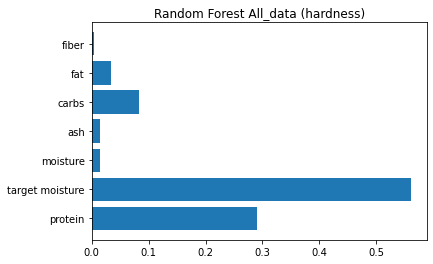

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('additional_30_12_12.csv',header=0)
features_all_RF_hard=data.iloc[:,2:9]
response = 'hardness'
if response=='crosswise':
    X = np.array(features_all_RF_hard)
   # y = np.array(features_all_RF_hard.iloc[:,6:7])
   # print(features_all_RF_hard.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all_RF_hard.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all_RF_hard)
   # y = np.array(features_all_RF_hard.iloc[:,7:8])    
   # print(features_all_RF_hard.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all_RF_hard.iloc[:,7:8].head())    

elif response=='chewiness':
    #y = np.array(data.iloc[:,9:10])
    y = np.array(data.loc[:,'Chewiness'])

    print(features_all_RF_hard.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    #y = np.array(data.iloc[:,8:9])
    y = np.array(data.loc[:,'Hardness'])
    print(features_all_RF_hard.head())
    print(data.iloc[:,8:9].head())        
X = np.array(features_all_RF_hard)



y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
#groups = data.iloc[:,10:11].values.ravel()
groups = list(data.Group_ID)
study_id = data.loc[:,'Study_ID']

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all_RF_hard.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = X #scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

RF_hard_reg = RandomForestRegressor(random_state=0).fit(X_tr, y.ravel())

# residual =  y_test.ravel()-prediction
# residuals_.append(residual)          
plt.barh(features_all_RF_hard.columns, RF_hard_reg.feature_importances_)
plt.title('Random Forest All_data '+ '('+response+')')
plt.show()





# CHEWINESS 

In [8]:
# 30 + 12 + 12 data + others
data = pd.read_csv(path)
m = data.shape[0]
print(f'number of samples: {m}')

data = data.replace(['YPI-com','YPI-local','FBC-com', 'FBI-local'], [79, 81, 56, 88])
data.WG_frac = pd.to_numeric(data.WG_frac)
groups = list(data.WG_frac.unique())
m_groups = len(groups)
print(f'groups: {groups}')
print(f'number of groups: {m_groups}')

# colors
cm_subsection = np.linspace(0.1, 0.98, m_groups)
colors = [cm.jet(x) for x in cm_subsection]
gcolors = dict(zip(groups, colors))
# markers
chiang19 = 'o'
chiang21 = 'd'
HMMA = '^'
markers = 4*chiang19 + 4*chiang21 + 4*HMMA
gmarkers = dict(zip(groups, markers))

print(f'features: {data.columns.values}')

number of samples: 54
groups: [0, 10, 20, 30, 40, 60, 80, 100, 79, 81, 56, 88]
number of groups: 12
features: ['no' 'WG_frac' 'protein' 'target moisture' 'moisture' 'ash' 'carbs' 'fat'
 'fiber' 'Hardness' 'Chewiness' 'Group_ID' 'Study_ID' 'Unnamed: 13'
 'Unnamed: 14']


features: ['protein' 'target moisture' 'moisture' 'ash' 'carbs' 'fat' 'fiber']


C:\Users\Sezin\anaconda3\envs\lab39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


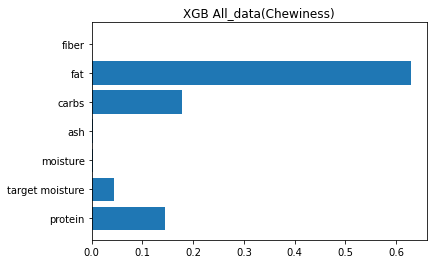

In [9]:
# default parameters
X_xg_chew = data.iloc[:, 2:9]
response = 'Chewiness'
y = data.loc[:, response]
print(f'features: {X_xg_chew.columns.values}')

xg_chew = xgb.XGBRegressor()

gkfold = GroupKFold(n_splits=m_groups).split(X, y, list(data.WG_frac))
y_predicted = [0 for i in range(m)]
y_true_groups = [[] for i in range(m_groups)]
y_predicted_groups = [[] for i in range(m_groups)]
y_predicted_2=[]
y_true_2=[]

scores_sum=0


# print(test_features)
xg_chew.fit(X_xg_chew, y)

scores_sum += xg_chew.feature_importances_
plt.barh(X_xg_chew.columns, xg_chew.feature_importances_)
plt.title('XGB All_data'+ '('+response+')')
plt.show()

#plt.savefig('a.pdf')

# RIDGE

   target moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3  3  3  3  3  3
  3  3  4  4  4  4]
12


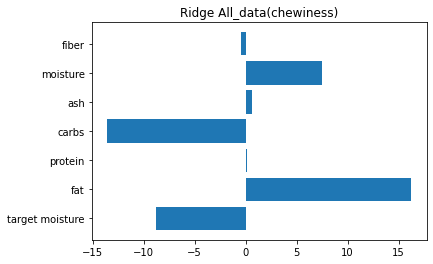

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('30_12_12.csv',header=0)
features_all_ridge_chew=data.iloc[:,1:8]

response = 'chewiness'
if response=='crosswise':
    X = np.array(features_all_ridge_chew)
   # y = np.array(features_all.iloc[:,6:7])
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all_ridge_chew)
   # y = np.array(features_all.iloc[:,7:8])    
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all_ridge_chew)
    y = np.array(data.iloc[:,9:10])
    print(features_all_ridge_chew.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all_ridge_chew)
    y = np.array(data.iloc[:,8:9])
    print(features_all_ridge_chew.head())
    print(data.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all_ridge_chew.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

ridge_chew = Ridge().fit(X_tr, y.ravel())

# residual =  y_test.ravel()-prediction
# residuals_.append(residual)          
plt.barh(features_all_ridge_chew.columns, ridge_chew.coef_)
plt.title('Ridge All_data'+ '('+response+')')
plt.show()





<BarContainer object of 7 artists>

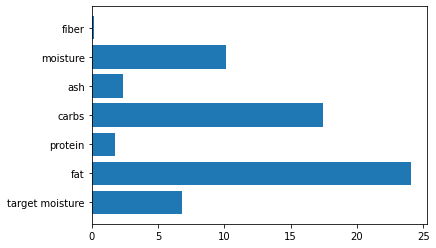

In [11]:
plt.barh(features_all_ridge_hard.columns, np.abs(ridge_hard.coef_))


# RF

   protein  target moisture  moisture     ash   carbs    fat  fiber
0  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
1  62.6988            56.85    5.3937  4.2445  20.491  6.662   0.51
2  62.6988            57.16    5.3937  4.2445  20.491  6.662   0.51
3  63.1788            57.51    5.9137  3.9545  19.861  6.582   0.51
4  63.1788            57.24    5.9137  3.9545  19.861  6.582   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
[5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
12


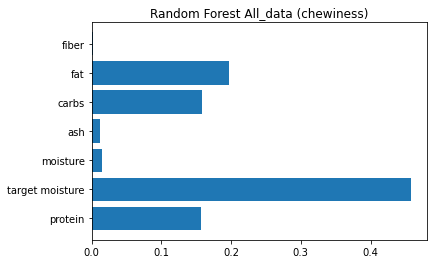

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
features_all_RF_chew=data.iloc[:,1:8]

response = 'chewiness'
data =pd.read_csv('additional_30_12_12.csv',header=0)
features_all_RF_chew=data.iloc[:,2:9]
if response=='crosswise':
    X = np.array(features_all_RF_chew)
   # y = np.array(features_all_RF_chew.iloc[:,6:7])
   # print(features_all_RF_chew.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all_RF_chew.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all_RF_chew)
   # y = np.array(features_all_RF_chew.iloc[:,7:8])    
   # print(features_all_RF_chew.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all_RF_chew.iloc[:,7:8].head())    

elif response=='chewiness':
    #y = np.array(data.iloc[:,9:10])
    y = np.array(data.loc[:,'Chewiness'])

    print(features_all_RF_chew.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    #y = np.array(data.iloc[:,8:9])
    y = np.array(data.loc[:,'Hardness'])
    print(features_all_RF_chew.head())
    print(data.iloc[:,8:9].head())        
X = np.array(features_all_RF_chew)    
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = list(data.Group_ID)
study_id = data.loc[:,'Study_ID']

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all_RF_chew.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = X# scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

RF_chew_reg = RandomForestRegressor(random_state=0).fit(X_tr, y.ravel())

# residual =  y_test.ravel()-prediction
# residuals_.append(residual)          
plt.barh(features_all_RF_chew.columns, RF_chew_reg.feature_importances_)
plt.title('Random Forest All_data '+ '('+response+')')
plt.show()





# Norm xh_hard

In [13]:
x=xg_hard.feature_importances_

In [14]:
normalized_xg_hard = (x-min(x))/(max(x)-min(x))
normalized_xg_hard

array([0.80076504, 0.3225257 , 0.11113237, 0.17071776, 0.7519317 ,
       1.        , 0.        ], dtype=float32)

<BarContainer object of 7 artists>

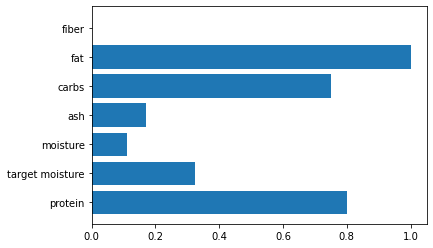

In [15]:
plt.barh(X_xg_hard.columns, normalized_xg_hard)


<BarContainer object of 7 artists>

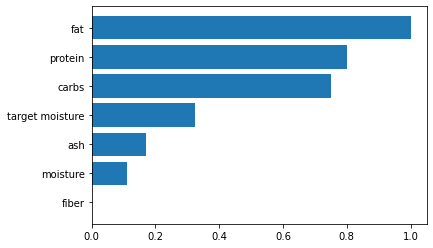

In [16]:
xg_hard_indices=np.argsort(normalized_xg_hard)
normalized_xg_hard_val=np.sort(normalized_xg_hard)
plt.barh(X_xg_hard.columns[xg_hard_indices], normalized_xg_hard_val)


# Norm xh_chew

In [17]:
x=xg_chew.feature_importances_

In [18]:
normalized_xg_chew = (x-min(x))/(max(x)-min(x))
normalized_xg_chew

array([0.22977962, 0.06871969, 0.00315897, 0.00163589, 0.28319037,
       1.        , 0.        ], dtype=float32)

<BarContainer object of 7 artists>

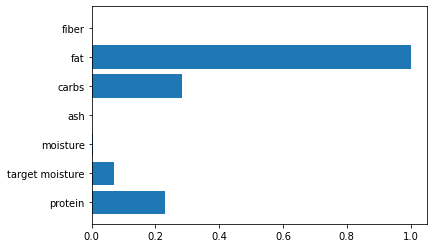

In [19]:
plt.barh(X_xg_chew.columns, normalized_xg_chew)


<BarContainer object of 7 artists>

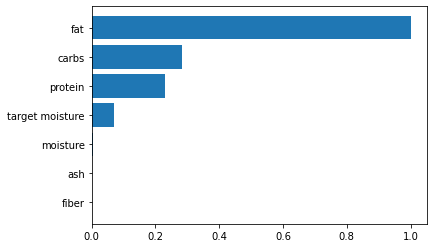

In [20]:
xg_chew_indices=np.argsort(normalized_xg_chew)
normalized_xg_chew_val=np.sort(normalized_xg_chew)
plt.barh(X_xg_chew.columns[xg_chew_indices], normalized_xg_chew_val)


<BarContainer object of 7 artists>

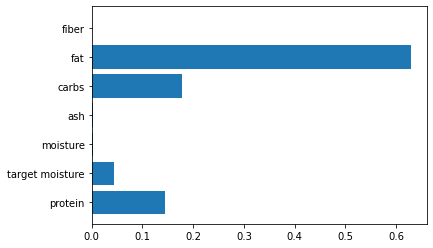

In [21]:
plt.barh(X_xg_chew.columns, xg_chew.feature_importances_)


# Norm RF_chew

In [22]:
features_all_RF_chew.columns, RF_chew_reg.feature_importances_

(Index(['protein', 'target moisture', 'moisture', 'ash', 'carbs', 'fat',
        'fiber'],
       dtype='object'),
 array([0.15729891, 0.45737427, 0.01540957, 0.01250099, 0.15890202,
        0.19673621, 0.00177802]))

In [23]:
x=np.abs(RF_chew_reg.feature_importances_)

In [24]:
normalized_RF_chew = (x-min(x))/(max(x)-min(x))
normalized_RF_chew

array([0.34135682, 1.        , 0.02992024, 0.02353612, 0.34487554,
       0.42791877, 0.        ])

<BarContainer object of 7 artists>

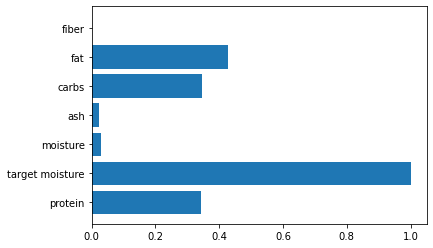

In [25]:
plt.barh(features_all_RF_chew.columns, normalized_RF_chew)


# Norm RF_hard

In [26]:
x=np.abs(RF_hard_reg.feature_importances_)

In [27]:
normalized_RF_hard = (x-min(x))/(max(x)-min(x))
normalized_RF_hard

array([0.51470054, 1.        , 0.02002828, 0.0193715 , 0.14178858,
       0.0544747 , 0.        ])

<BarContainer object of 7 artists>

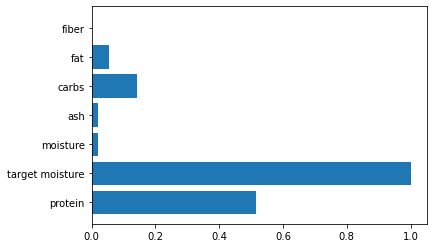

In [28]:
plt.barh(features_all_RF_hard.columns, normalized_RF_hard)


# Norm ridge_chew

In [29]:
x=np.abs(ridge_chew.coef_)

In [30]:
normalized_ridge_chew = (x-min(x))/(max(x)-min(x))
normalized_ridge_chew

array([0.53727202, 1.        , 0.        , 0.83606618, 0.03237954,
       0.45527927, 0.01767157])

<BarContainer object of 7 artists>

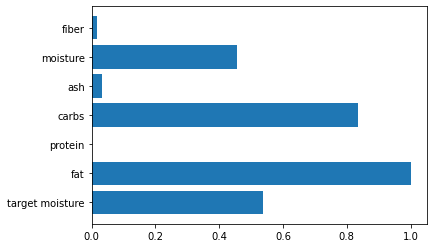

In [31]:
plt.barh(features_all_ridge_chew.columns, normalized_ridge_chew)


## sort ridge chew and adjust other to ridge

<BarContainer object of 7 artists>

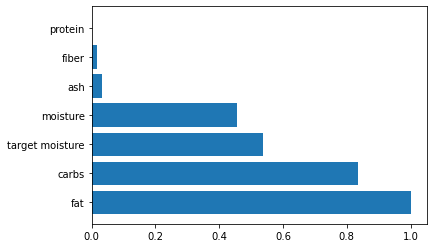

In [32]:
ridge_chew_indices=np.argsort(-normalized_ridge_chew)
normalized_ridge_chew_val=-np.sort(-normalized_ridge_chew)
plt.barh(features_all_ridge_chew.columns[ridge_chew_indices], normalized_ridge_chew_val)


<BarContainer object of 7 artists>

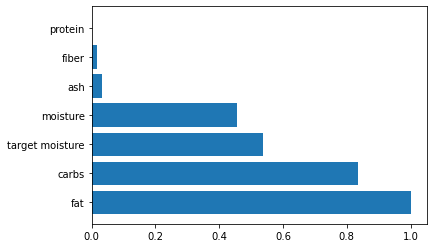

In [33]:
plt.barh(features_all_ridge_chew.columns[ridge_chew_indices], normalized_ridge_chew[ridge_chew_indices])


In [34]:
features_all_ridge_chew.columns[ridge_chew_indices]

Index(['fat', 'carbs', 'target moisture', 'moisture', 'ash', 'fiber',
       'protein'],
      dtype='object')

<BarContainer object of 7 artists>

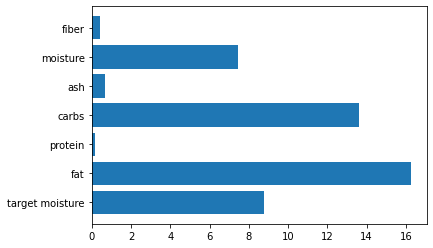

In [35]:
plt.barh(features_all_ridge_chew.columns, np.abs(ridge_chew.coef_)
        )


# Norm ridge_hard

In [36]:
x=np.abs(ridge_hard.coef_)

In [37]:
normalized_ridge_hard = (x-min(x))/(max(x)-min(x))
normalized_ridge_hard

array([0.27704839, 1.        , 0.06651147, 0.7243284 , 0.09102061,
       0.41618256, 0.        ])

<BarContainer object of 7 artists>

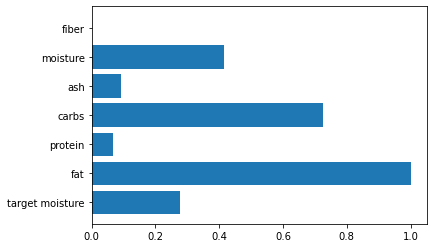

In [38]:
plt.barh(features_all_ridge_hard.columns, normalized_ridge_hard)


## sort ridge hard and adjust other to ridge

<BarContainer object of 7 artists>

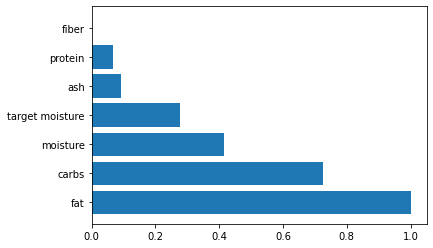

In [39]:
ridge_hard_indices=np.argsort(-normalized_ridge_hard)
normalized_ridge_hard_val=-np.sort(-normalized_ridge_hard)
plt.barh(features_all_ridge_hard.columns[ridge_hard_indices], normalized_ridge_hard_val)


<BarContainer object of 7 artists>

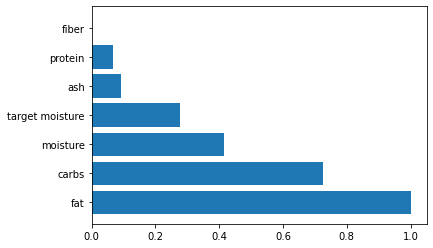

In [40]:
plt.barh(features_all_ridge_hard.columns[ridge_hard_indices], normalized_ridge_hard[ridge_hard_indices])


<BarContainer object of 7 artists>

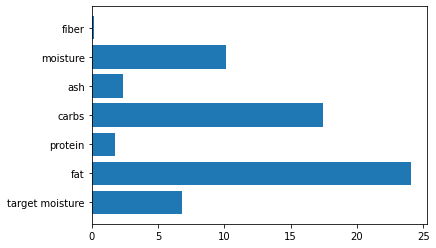

In [41]:
plt.barh(features_all_ridge_hard.columns, np.abs(ridge_hard.coef_)
        )


# converting to the same order with Ridge

### hardness

### XGB

In [42]:
features_all_ridge_hard.columns[ridge_hard_indices]

Index(['fat', 'carbs', 'moisture', 'target moisture', 'ash', 'protein',
       'fiber'],
      dtype='object')

In [43]:
xgb_hard_same_indices_with_ridge = [X_xg_hard.columns.get_loc(i ) for i in features_all_ridge_hard.columns[ridge_hard_indices]]

### RF

In [44]:
rf_hard_same_indices_with_ridge = [features_all_RF_hard.columns.get_loc(i ) for i in features_all_ridge_hard.columns[ridge_hard_indices]]

<BarContainer object of 7 artists>

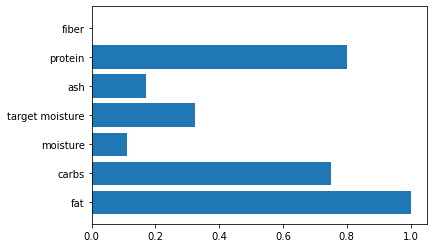

In [45]:
plt.barh(X_xg_hard.columns[xgb_hard_same_indices_with_ridge], normalized_xg_hard[xgb_hard_same_indices_with_ridge]) #not sorted


<BarContainer object of 7 artists>

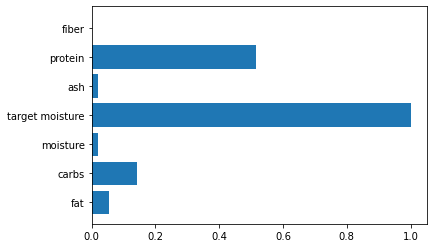

In [46]:
plt.barh(features_all_RF_hard.columns[rf_hard_same_indices_with_ridge], normalized_RF_hard[rf_hard_same_indices_with_ridge]) #not sorted


<BarContainer object of 7 artists>

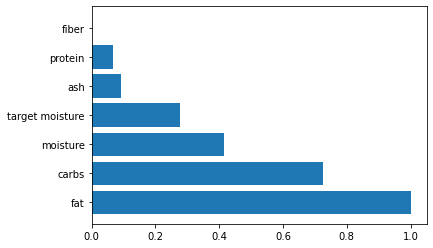

In [47]:
plt.barh(features_all_ridge_hard.columns[ridge_hard_indices], normalized_ridge_hard_val) #sorted


### chewiness

### XGB

In [48]:
xgb_chew_same_indices_with_ridge = [X_xg_chew.columns.get_loc(i ) for i in features_all_ridge_chew.columns[ridge_chew_indices]]

<BarContainer object of 7 artists>

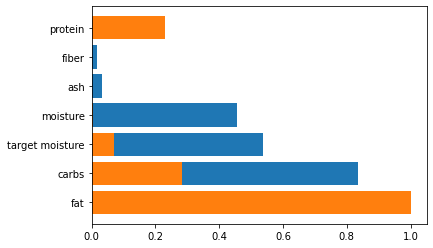

In [49]:
plt.barh(features_all_ridge_chew.columns[ridge_chew_indices], normalized_ridge_chew_val) #sorted
plt.barh(X_xg_chew.columns[xgb_chew_same_indices_with_ridge], normalized_xg_chew[xgb_chew_same_indices_with_ridge]) ##not sorted


### RF

In [50]:
rf_chew_same_indices_with_ridge = [features_all_RF_chew.columns.get_loc(i ) for i in features_all_ridge_chew.columns[ridge_chew_indices]]

<BarContainer object of 7 artists>

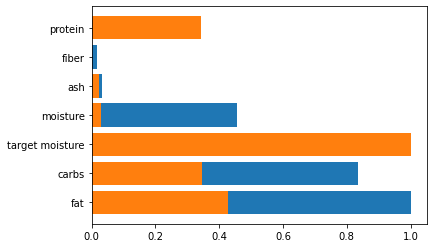

In [51]:
plt.barh(features_all_ridge_chew.columns[ridge_chew_indices], normalized_ridge_chew_val) #sorted
plt.barh(features_all_RF_chew.columns[rf_chew_same_indices_with_ridge], normalized_RF_chew[rf_chew_same_indices_with_ridge]) ##not sorted


### plot them

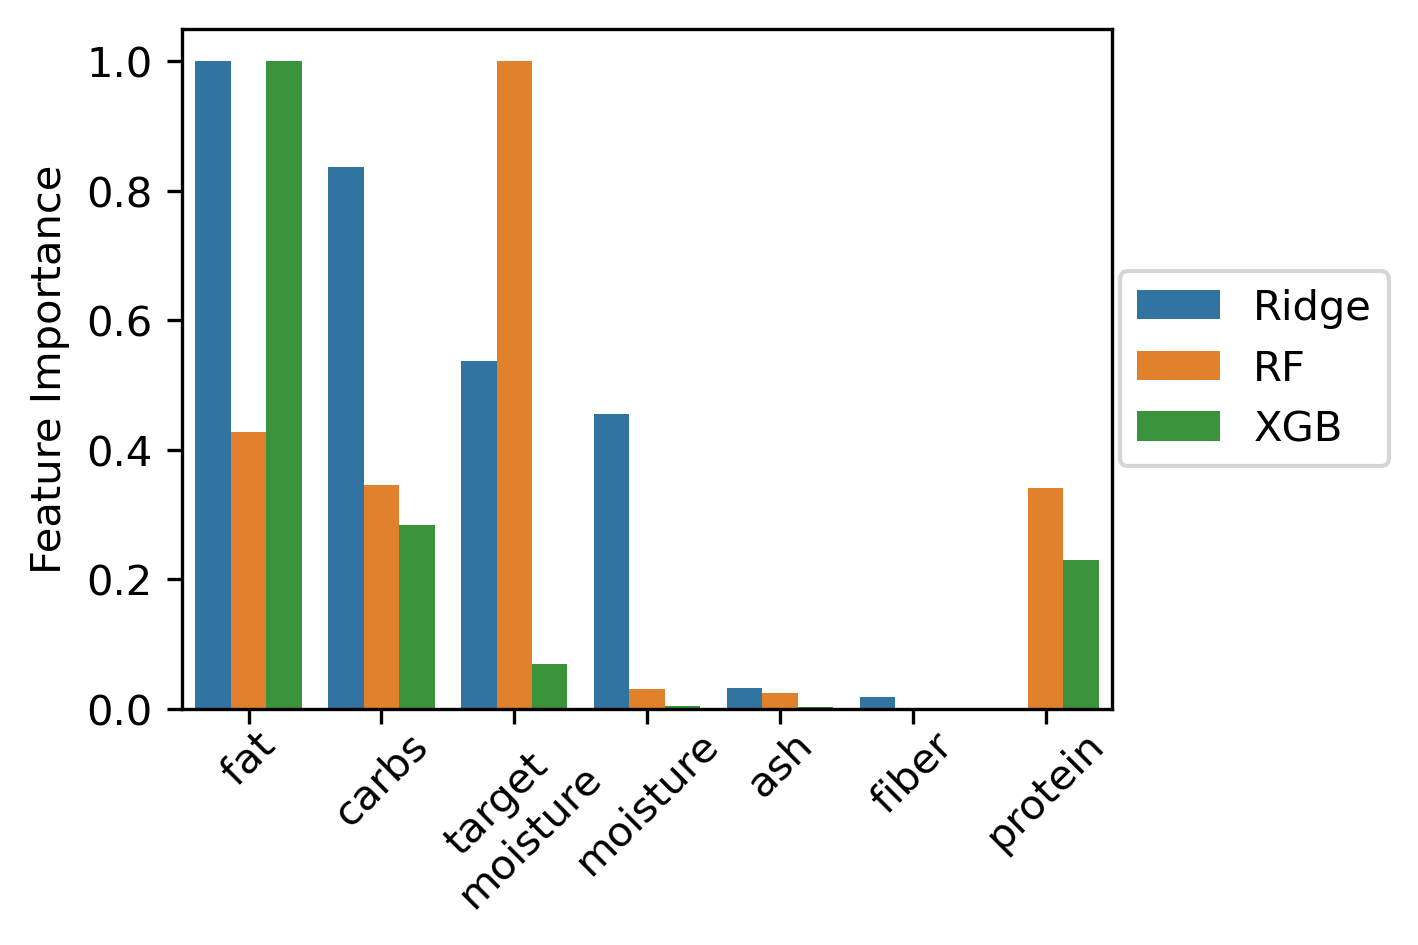

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features_all_ridge_chew = features_all_ridge_chew.rename(columns={"target moisture": "target\nmoisture"})
X_xg_chew = X_xg_chew.rename(columns={"target moisture": "target\nmoisture"})
features_all_RF_chew = features_all_RF_chew.rename(columns={"target moisture": "target\nmoisture"})


fig = plt.figure(figsize=(4,3), dpi=300)

df1=pd.DataFrame({'x':features_all_ridge_chew.columns[ridge_chew_indices],'y':normalized_ridge_chew_val})
df2=pd.DataFrame({'x':features_all_RF_chew.columns[rf_chew_same_indices_with_ridge],'y':normalized_RF_chew[rf_chew_same_indices_with_ridge]})
df3=pd.DataFrame({'x':X_xg_chew.columns[xgb_chew_same_indices_with_ridge],'y':normalized_xg_chew[xgb_chew_same_indices_with_ridge]})

df1['Model']='Ridge'
df2['Model']='RF'
df3['Model']='XGB'

res=pd.concat([df1,df2,df3])
sns.barplot(x='x',y='y',data=res,hue='Model')
#sns.despine(left=True, bottom=True)
plt.ylabel('Feature Importance')
plt.xlabel('')
plt.xticks(rotation='45',y=0.02)
plt.legend(title='', bbox_to_anchor=(1.32, 0.5),loc='right')

plt.savefig('feature_subsets_chew_legend_r_samefilewithXGB.pdf', bbox_inches='tight')
plt.show()

### chewiness chosen_subset

In [53]:
xgboost_chew= ['protein' 'carbs' 'fat']
rf_chew= ['target moisture', 'protein', 'carbs', 'fat']
ridge_chew=['target_moisture', 'fat', 'carbs', 'moisture']

In [54]:
df3

,x,y,Model
0,fat,1.000000,XGB
1,carbs,0.283190,XGB
2,target\nmoisture,0.068720,XGB
3,moisture,0.003159,XGB
4,ash,0.001636,XGB
5,fiber,0.000000,XGB
6,protein,0.229780,XGB


In [55]:
res

,x,y,Model
0,fat,1.000000,Ridge
1,carbs,0.836066,Ridge
2,target\nmoisture,0.537272,Ridge
3,moisture,0.455279,Ridge
4,ash,0.032380,Ridge
5,fiber,0.017672,Ridge
6,protein,0.000000,Ridge
0,fat,0.427919,RF
1,carbs,0.344876,RF
2,target\nmoisture,1.000000,RF


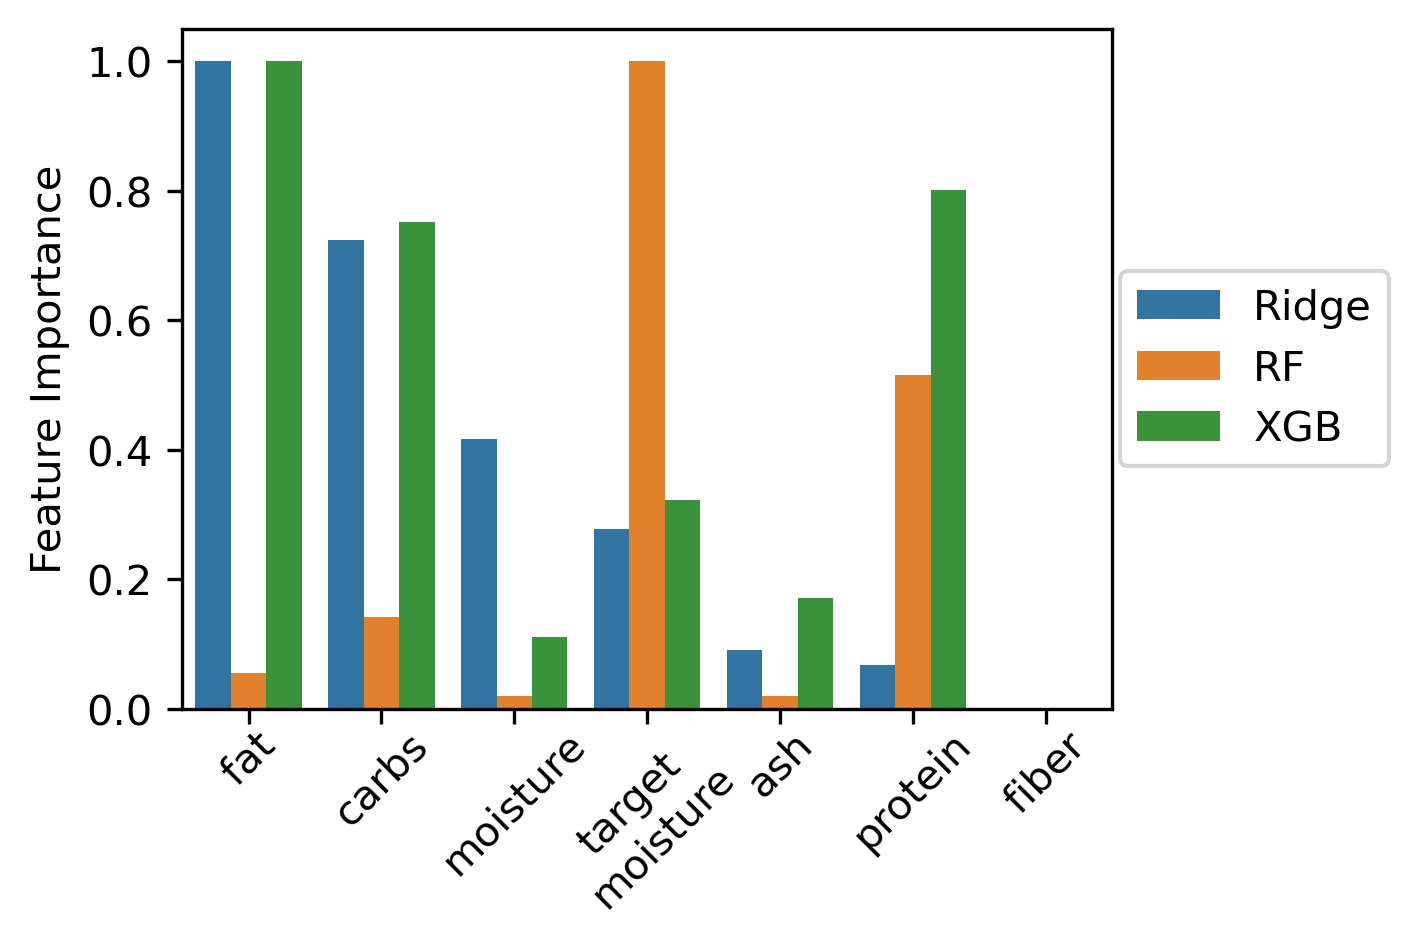

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features_all_ridge_hard = features_all_ridge_hard.rename(columns={"target moisture": "target\nmoisture"})
X_xg_hard = X_xg_hard.rename(columns={"target moisture": "target\nmoisture"})
features_all_RF_hard = features_all_RF_hard.rename(columns={"target moisture": "target\nmoisture"})


fig = plt.figure(figsize=(4,3), dpi=300)

df1=pd.DataFrame({'x':features_all_ridge_hard.columns[ridge_hard_indices],'y':normalized_ridge_hard_val})
df2=pd.DataFrame({'x':features_all_RF_hard.columns[rf_hard_same_indices_with_ridge],'y':normalized_RF_hard[rf_hard_same_indices_with_ridge]})
df3=pd.DataFrame({'x':X_xg_hard.columns[xgb_hard_same_indices_with_ridge],'y':normalized_xg_hard[xgb_hard_same_indices_with_ridge]})

df1['Model']='Ridge'
df2['Model']='RF'
df3['Model']='XGB'

res=pd.concat([df1,df2,df3])
sns.barplot(x='x',y='y',data=res,hue='Model')
#sns.despine(left=True, bottom=True)
plt.ylabel('Feature Importance')
plt.xlabel('')
plt.xticks(rotation='45',y=0.02)
plt.legend(title='',bbox_to_anchor=(1.32, 0.5),loc='right')

plt.savefig('feature_subsets_hard_legend_r_samefilewithXGB.pdf', bbox_inches='tight')
plt.show()

In [57]:
res

,x,y,Model
0,fat,1.000000,Ridge
1,carbs,0.724328,Ridge
2,moisture,0.416183,Ridge
3,target\nmoisture,0.277048,Ridge
4,ash,0.091021,Ridge
5,protein,0.066511,Ridge
6,fiber,0.000000,Ridge
0,fat,0.054475,RF
1,carbs,0.141789,RF
2,moisture,0.020028,RF


### chosen_subset hardness

In [58]:
rf_hard=['target moisture', 'protein', 'carbs']
xgb_hard=['protein' 'target moisture' 'carbs' 'fat']
ridge_hard=['target_moisture', 'fat', 'carbs', 'moisture']

In [59]:
import os
os.getcwd()
os.chdir('./')
os.getcwd()


'C:\\Users\\Sezin\\Documents\\FoodAI\\feature_selection\\30_12_12_leave_group_o\\Figures\\Feature_Subsets'

In [60]:
res

,x,y,Model
0,fat,1.000000,Ridge
1,carbs,0.724328,Ridge
2,moisture,0.416183,Ridge
3,target\nmoisture,0.277048,Ridge
4,ash,0.091021,Ridge
5,protein,0.066511,Ridge
6,fiber,0.000000,Ridge
0,fat,0.054475,RF
1,carbs,0.141789,RF
2,moisture,0.020028,RF
